In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

wwq= pd.read_csv("C:/Users/victus/OneDrive/Documents/winequalitywhite.csv",delimiter=';')
wwq
wwq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
wwq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wwq.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
rows = len(wwq.axes[0]) 
cols = len(wwq.axes[1])

print("Number of Rows: ",str(rows)) 
print("Number of Columns: ", str(cols))

Number of Rows:  4898
Number of Columns:  12


In [6]:

null = wwq.isnull().sum().to_frame(name='nulls').T
dtype = wwq.dtypes.to_frame(name='dtypes').T
nunique = wwq.nunique().to_frame(name='unique').T
pd.concat([null,dtype,nunique],axis=0)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
nulls,0,0,0,0,0,0,0,0,0,0,0,0
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
unique,68,125,87,310,160,132,251,890,103,79,103,7


<Axes: >

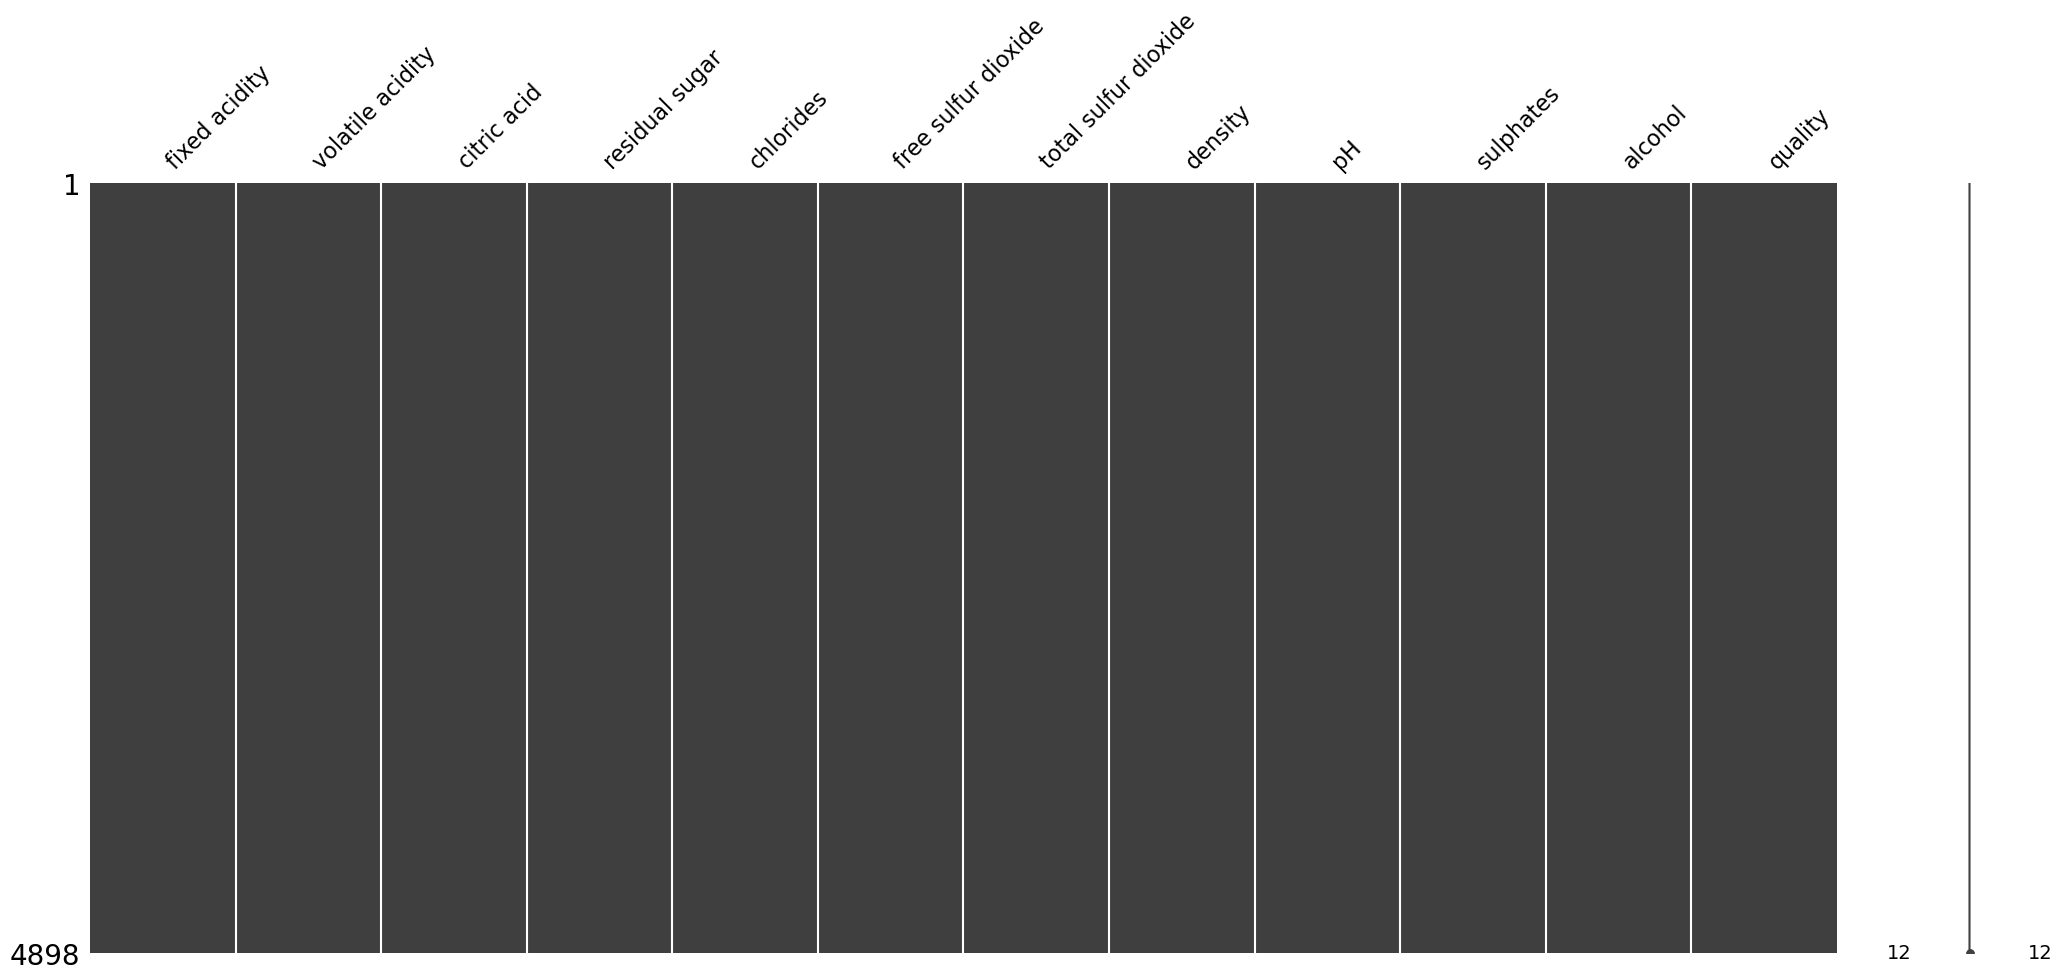

In [7]:
msno.matrix(wwq)

In [8]:
round(wwq.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,138.0,1.0,3.0,0.0,11.0,6.0
std,1.0,0.0,0.0,5.0,0.0,17.0,42.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,2.0,9.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,108.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,5.0,0.0,34.0,134.0,1.0,3.0,0.0,10.0,6.0
75%,7.0,0.0,0.0,10.0,0.0,46.0,167.0,1.0,3.0,1.0,11.0,6.0
max,14.0,1.0,2.0,66.0,0.0,289.0,440.0,1.0,4.0,1.0,14.0,9.0


Columns like residual sugar, free sulfur dioxide, total sulfur dioxide have outliers since thier maximums values recorded vary hugely with their mean. Mean is highly sensitive to the outliers.

Text(0.5, 0, 'Fixed Acidity')

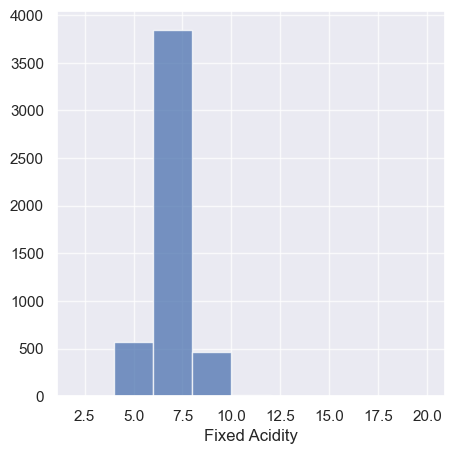

In [47]:
plt.hist(x=wwq['fixed acidity'], bins=[2,4,6,8,10,12,14,16,18,20], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Fixed Acidity')

<Axes: xlabel='fixed acidity', ylabel='Density'>

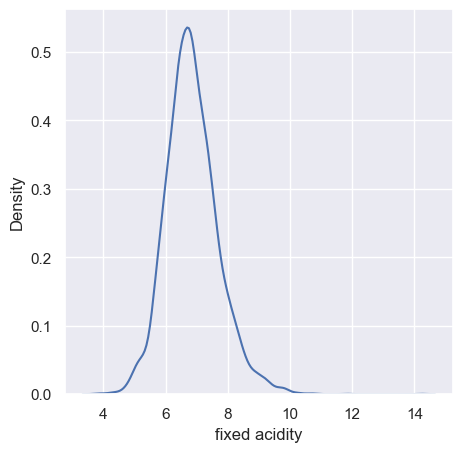

In [61]:
sns.kdeplot(wwq, x="fixed acidity")

Text(0.5, 0, 'Volatile Acidity')

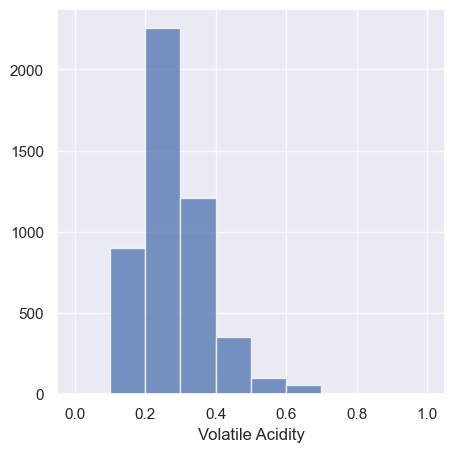

In [62]:
plt.hist(x=wwq['volatile acidity'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Volatile Acidity')

<Axes: xlabel='volatile acidity', ylabel='Density'>

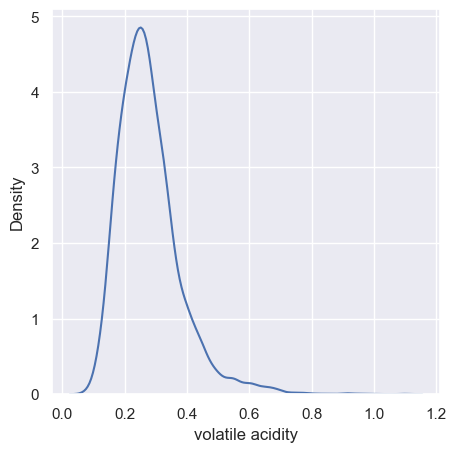

In [63]:
sns.kdeplot(wwq, x="volatile acidity")

Text(0.5, 0, 'Citric Acid')

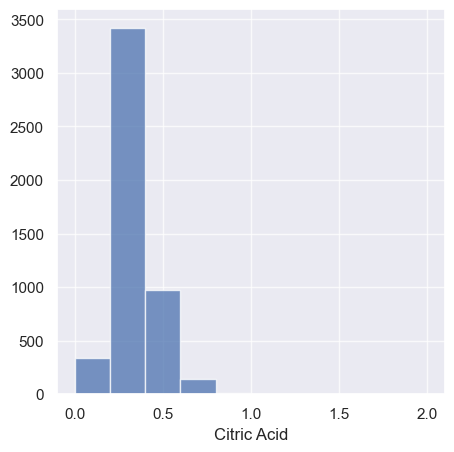

In [49]:
plt.hist(x=wwq['citric acid'], bins=[0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Citric Acid')

<Axes: xlabel='citric acid', ylabel='Density'>

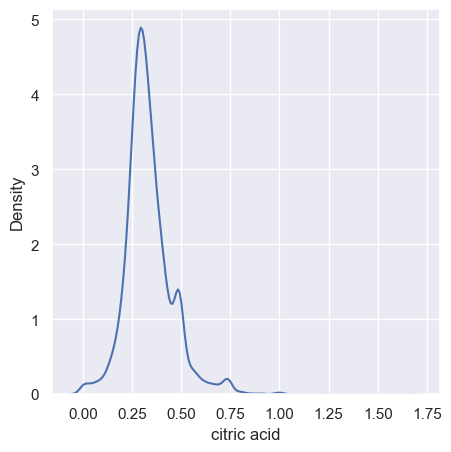

In [64]:
sns.kdeplot(wwq, x="citric acid")

Text(0.5, 0, 'Residual Sugar')

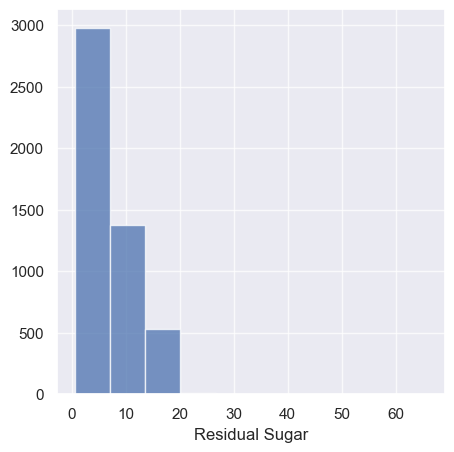

In [50]:
plt.hist(x=wwq['residual sugar'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Residual Sugar')

<Axes: xlabel='residual sugar', ylabel='Density'>

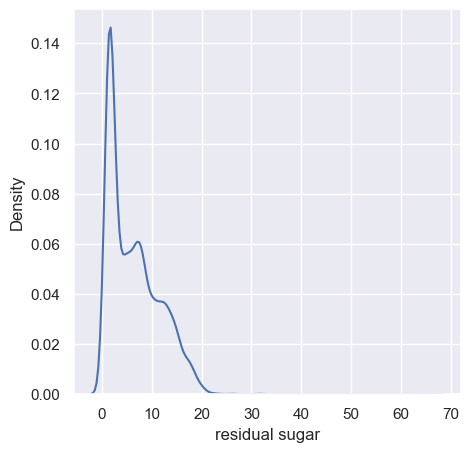

In [65]:
sns.kdeplot(wwq, x="residual sugar")

Text(0.5, 0, 'Chlorides')

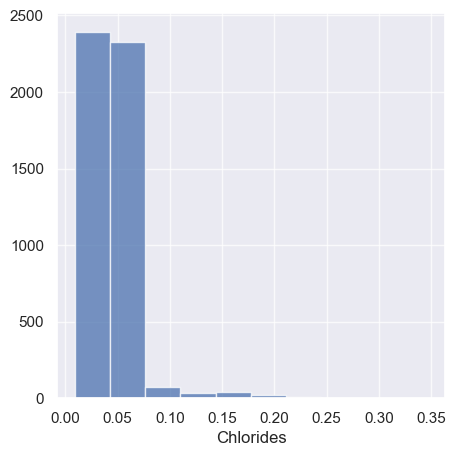

In [51]:
plt.hist(x=wwq['chlorides'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel("Chlorides")

<Axes: xlabel='chlorides', ylabel='Density'>

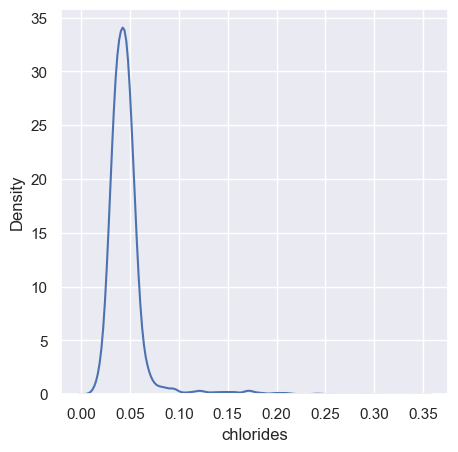

In [66]:
sns.kdeplot(wwq, x="chlorides")

Text(0.5, 0, 'Free Sulfur Dioxide')

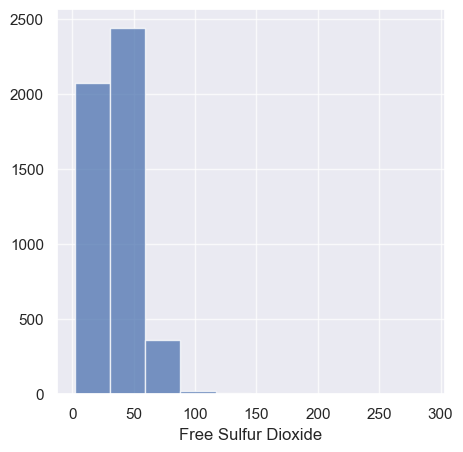

In [52]:
plt.hist(x=wwq['free sulfur dioxide'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Free Sulfur Dioxide')

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

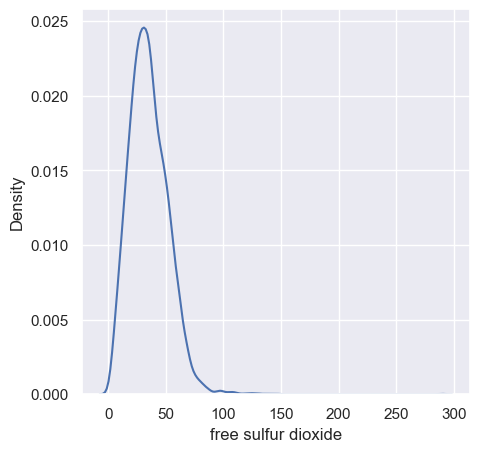

In [67]:
sns.kdeplot(wwq, x="free sulfur dioxide")

Text(0.5, 0, 'Total Sulfur Dioxide')

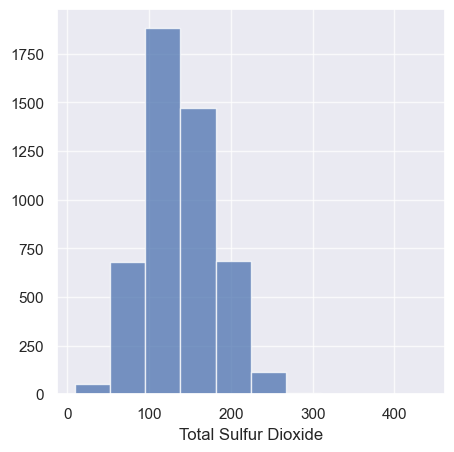

In [53]:
plt.hist(x=wwq['total sulfur dioxide'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Total Sulfur Dioxide')

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

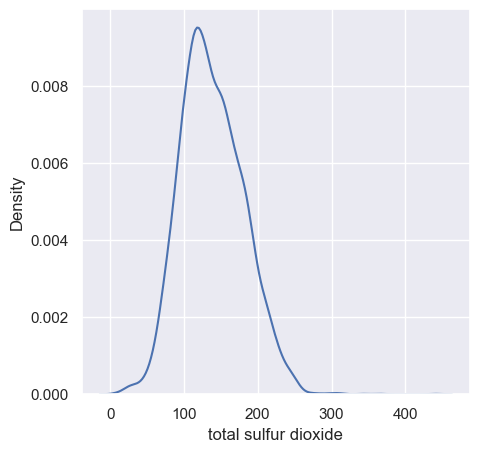

In [68]:
sns.kdeplot(wwq, x="total sulfur dioxide")

Text(0.5, 0, 'Density')

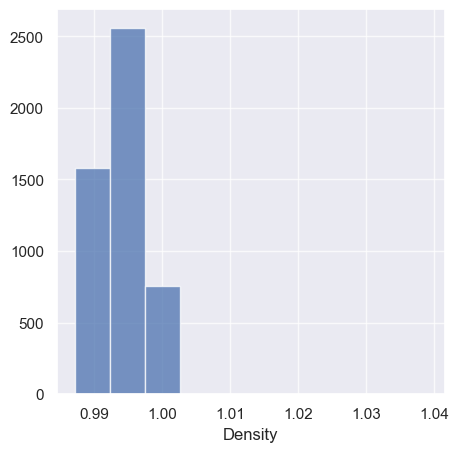

In [54]:
plt.hist(x=wwq['density'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Density')

<Axes: xlabel='density', ylabel='Density'>

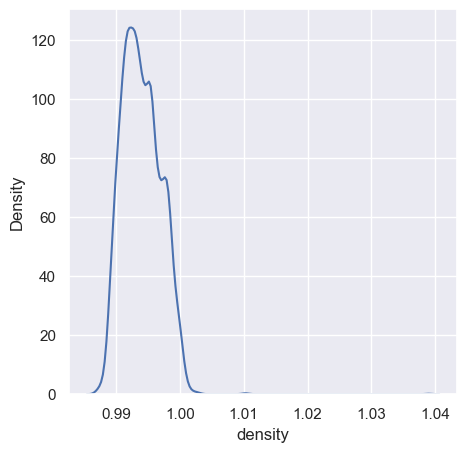

In [69]:
sns.kdeplot(wwq, x="density")

Text(0.5, 0, 'PH')

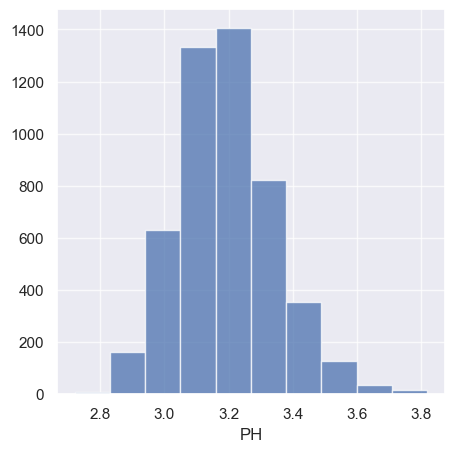

In [55]:
plt.hist(x=wwq['pH'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('PH')

<Axes: xlabel='pH', ylabel='Density'>

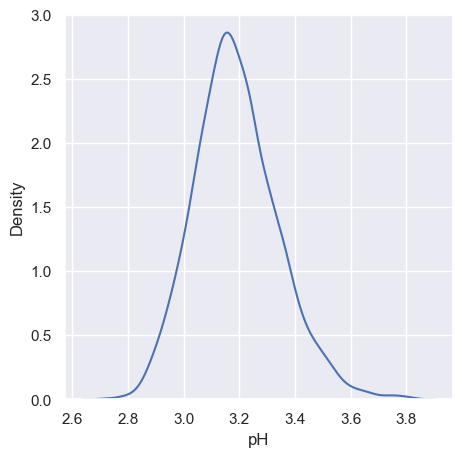

In [70]:
sns.kdeplot(wwq, x="pH")

Text(0.5, 0, 'Sulphates')

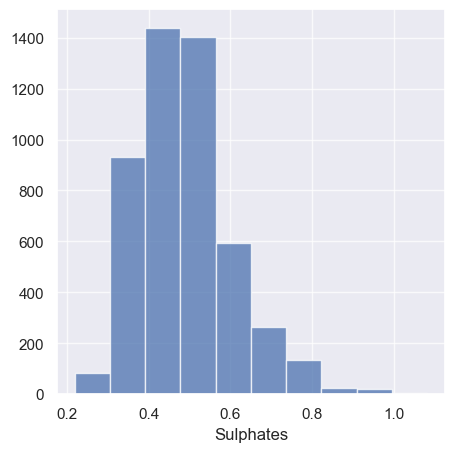

In [56]:
plt.hist(x=wwq['sulphates'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Sulphates')

<Axes: xlabel='sulphates', ylabel='Density'>

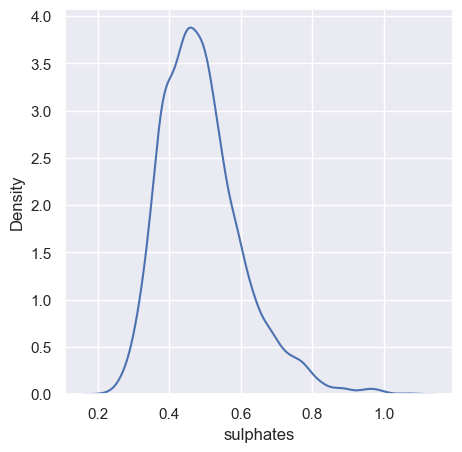

In [71]:
sns.kdeplot(wwq, x="sulphates")

Text(0.5, 0, 'Quality')

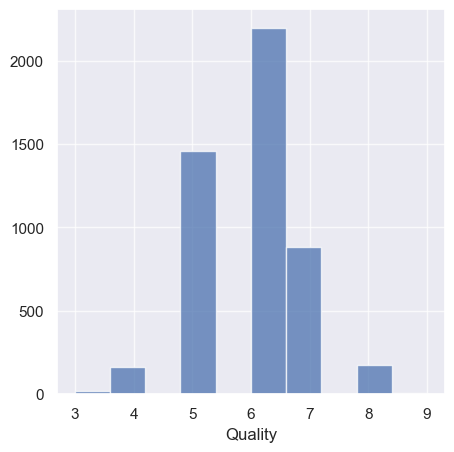

In [58]:
plt.hist(x=wwq['quality'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Quality')

<Axes: xlabel='quality', ylabel='Density'>

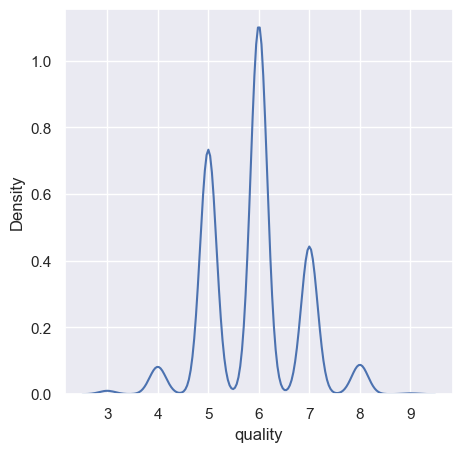

In [72]:
sns.kdeplot(wwq, x="quality")

Text(0.5, 0, 'Alcohol')

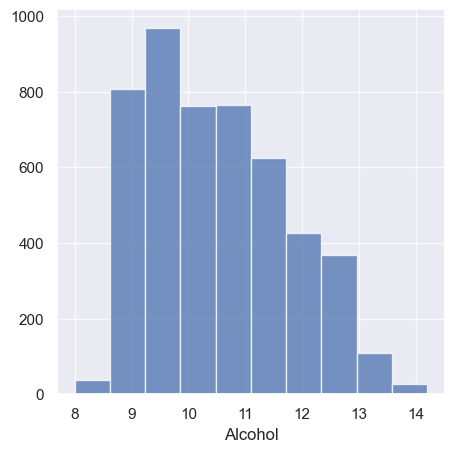

In [75]:
plt.hist(x=wwq['alcohol'], alpha=0.75)
plt.grid(alpha=0.75)
plt.xlabel('Alcohol')

<Axes: xlabel='alcohol', ylabel='Density'>

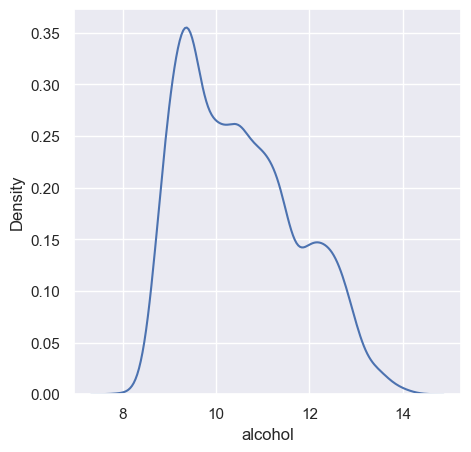

In [74]:
sns.kdeplot(wwq, x="alcohol")

<Axes: xlabel='fixed acidity'>

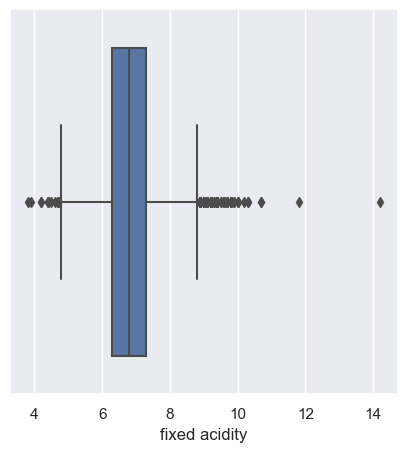

In [23]:
sns.set(rc={"figure.figsize":(5,5)})
sns.boxplot(x=wwq["fixed acidity"])

<Axes: xlabel='volatile acidity'>

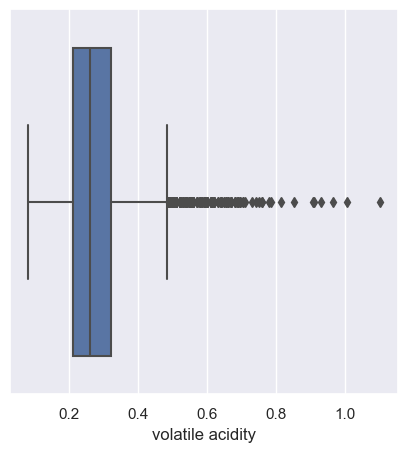

In [24]:
sns.boxplot(x=wwq["volatile acidity"])

<Axes: xlabel='citric acid'>

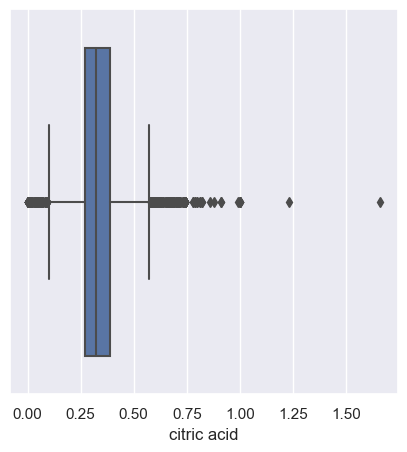

In [25]:
sns.boxplot(x=wwq["citric acid"])

<Axes: xlabel='residual sugar'>

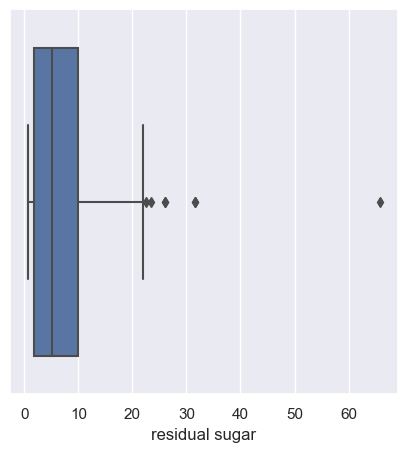

In [26]:
sns.boxplot(x=wwq["residual sugar"])

<Axes: xlabel='chlorides'>

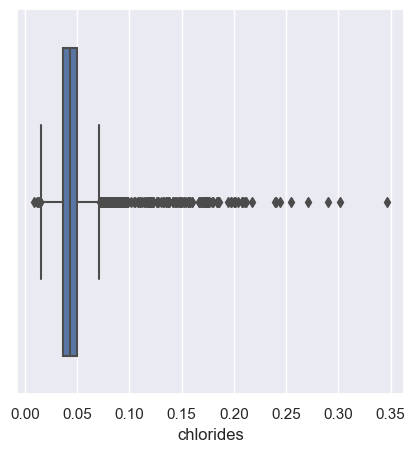

In [27]:
sns.boxplot(x=wwq["chlorides"])

<Axes: xlabel='free sulfur dioxide'>

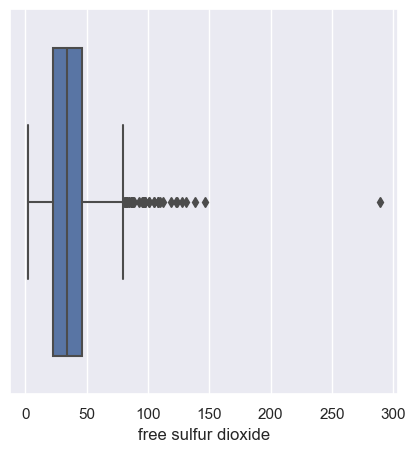

In [28]:
sns.boxplot(x=wwq["free sulfur dioxide"])

<Axes: xlabel='total sulfur dioxide'>

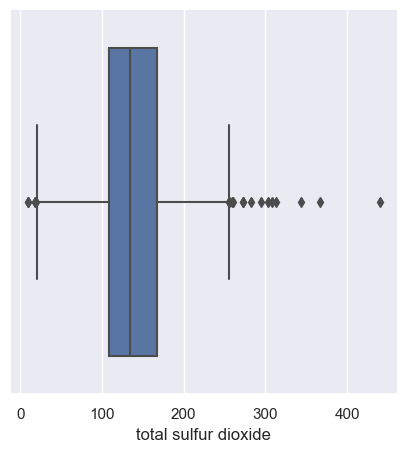

In [29]:
sns.boxplot(x=wwq["total sulfur dioxide"])

<Axes: xlabel='density'>

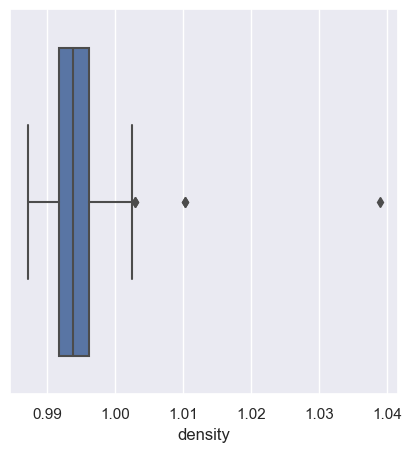

In [31]:
sns.boxplot(x=wwq["density"])

<Axes: xlabel='pH'>

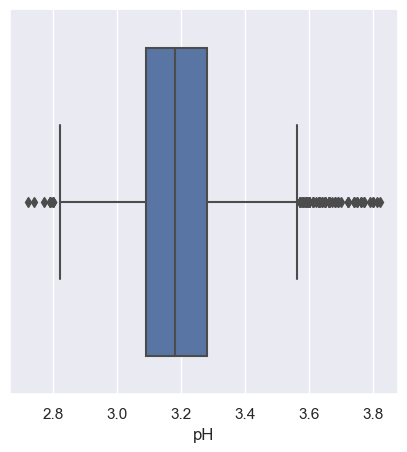

In [32]:
sns.boxplot(x=wwq["pH"])

<Axes: xlabel='sulphates'>

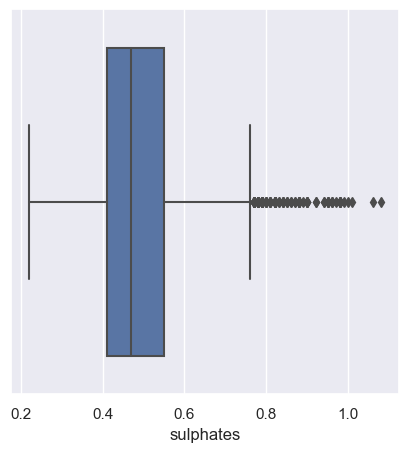

In [33]:
sns.boxplot(x=wwq["sulphates"])

<Axes: xlabel='alcohol'>

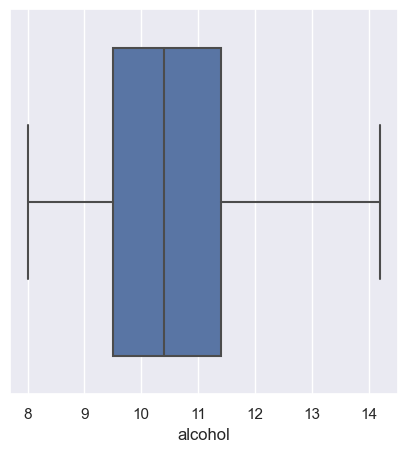

In [34]:
sns.boxplot(x=wwq["alcohol"])

<Axes: xlabel='quality'>

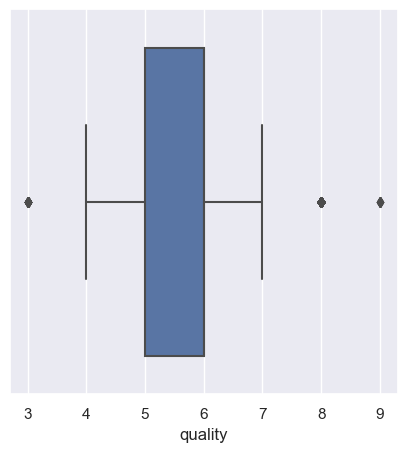

In [35]:
sns.boxplot(x=wwq["quality"])

In [78]:
qt=pd.crosstab(wwq['quality'], 'No. of units')
qt

col_0,No. of units
quality,
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


Text(0, 0.5, 'No. of Units')

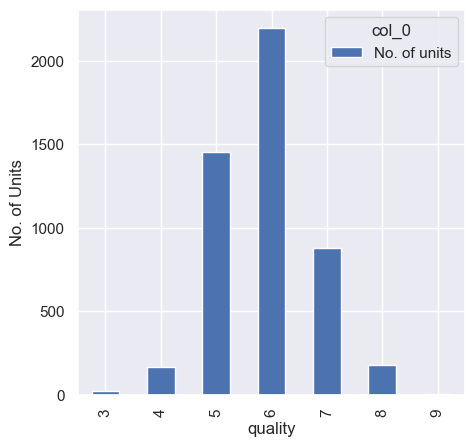

In [80]:
qt.plot(kind="bar")
plt.ylabel("No. of Units")

In [83]:
matrix=wwq.corr().round(2)
matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12,-0.11
volatile acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07,-0.19
citric acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08,-0.01
residual sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45,-0.10
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36,-0.21
free sulfur dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,-0.00,0.06,-0.25,0.01
total sulfur dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45,-0.17
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78,-0.31
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,-0.09,1.00,0.16,0.12,0.10
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02,0.05


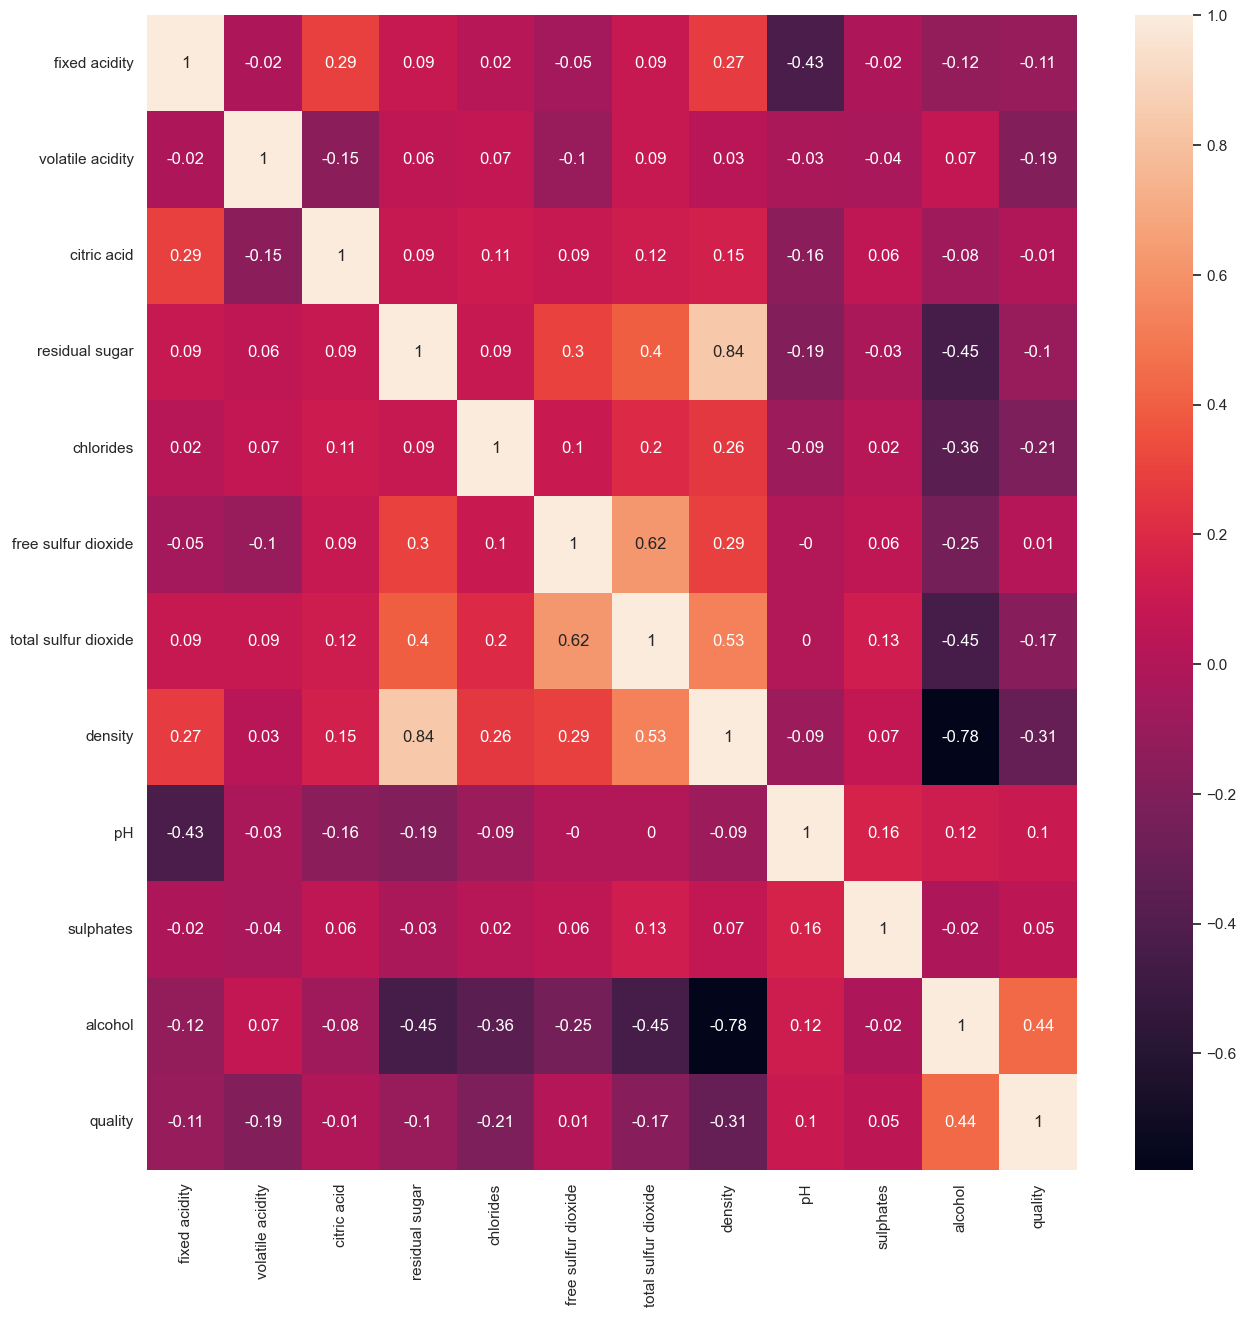

In [87]:
plt.figure(figsize=(15, 15))
sns.heatmap(matrix, annot=True)
plt.show()

Variables residual sugar and density are positively correlated to each other.
Variables free sulfur dioxide and total sulfur dioxide are positively correlated to each other.
Variables free density and total sulfur dioxide are positively correlated to each other.
Variables residual sugar and total sulfur dioxide are positively correlated to each other.
